In [2]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, IPython.display
%matplotlib inline

In [3]:
x,fs = librosa.load('train03.wav')
IPython.display.Audio(x, rate=fs)

In [4]:
X = librosa.stft(x)
H, P = librosa.decompose.hpss(X)

In [5]:
h = librosa.istft(H)

In [6]:
IPython.display.Audio(h, rate=fs)

In [7]:
librosa.output.write_wav('train03_h.wav', h, fs)

In [21]:
import os.path
from numpy import array, ma
import numpy,scipy, sklearn
import librosa
from aubio import source,pitch
# import IPython.display #import when running in Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline

def array_from_text_file(filename, dtype = 'float'):
    print('ground truth file dir:',filename)
    return array([line.split() for line in open(filename).readlines()],
        dtype = dtype)


def pitch_detection(filename,sr,ground_truth,win_s,hop_s,downsample,tolerance,pitch_method):
    # global pitch,source
    samplerate = sr
    s = source(filename, samplerate, hop_s)
    samplerate = s.samplerate

    pitch_o = pitch(pitch_method, win_s, hop_s, samplerate)
    # pitch_o.set_unit("midi") # default is HZ
    pitch_o.set_tolerance(tolerance)

    pitches = []
    confidences = []

    # total number of frames read
    total_frames = 0
    while True:
        samples, read = s()
        pitch_sample = pitch_o(samples)[0]
        confidence = pitch_o.get_confidence()

        pitches += [pitch_sample]
        confidences += [confidence]
        total_frames += read
        if read < hop_s: break

    # detect pitches
    skip = 1

    pitches = array(pitches[skip:])
    confidences = array(confidences[skip:])
    times = [t * hop_s for t in range(len(pitches))]

    if os.path.isfile(ground_truth):
        ground_truth = array_from_text_file(ground_truth)
        true_freqs = ground_truth[:,1]
        true_freqs = ma.masked_where(true_freqs < 2, true_freqs)
        true_times = ground_truth[:,0]

    cleaned_pitches = pitches
    cleaned_pitches = ma.masked_where(confidences < tolerance, cleaned_pitches)
    actual_times = [t/float(samplerate) for t in times]
    cleaned_pitches = ma.masked_where(cleaned_pitches > 300, cleaned_pitches)
    cleaned_pitches = ma.masked_where(cleaned_pitches < 50, cleaned_pitches)
    plt.plot(actual_times, cleaned_pitches, 'g')
    plt.plot(true_times, true_freqs, 'r')
    plt.show()

def save_harmonic_file(filename):
    x,fs = librosa.load(filename)
    X = librosa.stft(x)
    H, P = librosa.decompose.hpss(X)
    h = librosa.istft(H)
    
    output = filename.split('.')[0]+'_h.wav'
    if not os.path.isfile(output):
        print('Saving output file:',output)
        librosa.output.write_wav(output, h, fs)
    return output,fs


downsample = 1
win_s = 4096 // downsample # fft size
hop_s = 512  // downsample # hop size
tolerance = 0.8
pitch_method='yin'

('Saving output file:', 'train01_h.wav')
('ground truth file dir:', 'train01REF.txt')


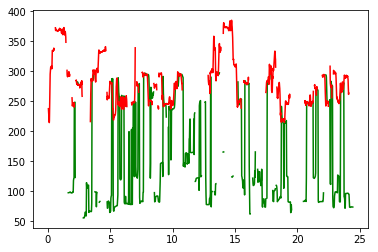

('Saving output file:', 'train02_h.wav')
('ground truth file dir:', 'train02REF.txt')


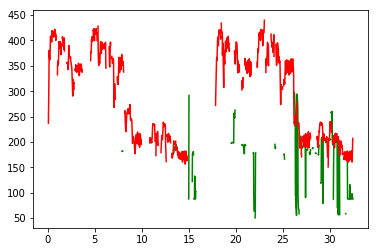

('ground truth file dir:', 'train03REF.txt')


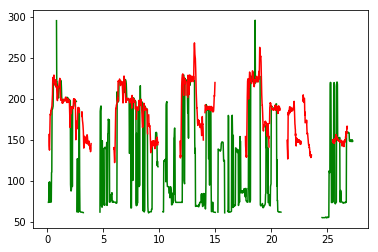

('Saving output file:', 'train04_h.wav')
('ground truth file dir:', 'train04REF.txt')


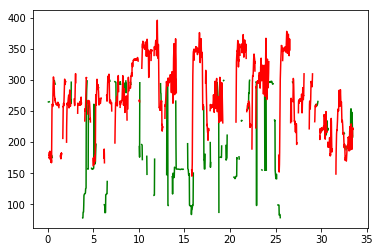

('Saving output file:', 'train05_h.wav')
('ground truth file dir:', 'train05REF.txt')


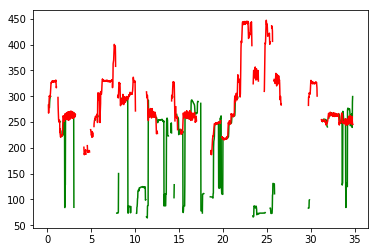

('Saving output file:', 'train06_h.wav')
('ground truth file dir:', 'train06REF.txt')


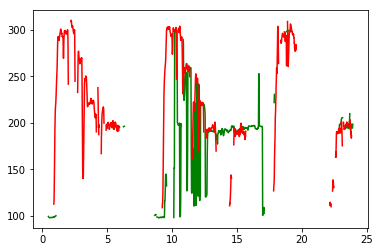

('Saving output file:', 'train07_h.wav')
('ground truth file dir:', 'train07REF.txt')


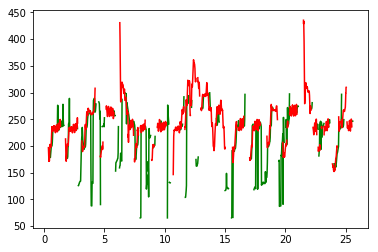

('Saving output file:', 'train08_h.wav')
('ground truth file dir:', 'train08REF.txt')


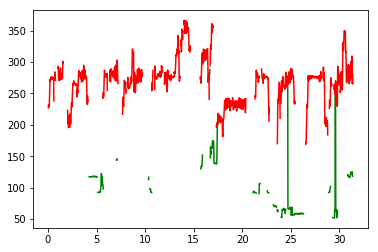

('Saving output file:', 'train09_h.wav')
('ground truth file dir:', 'train09REF.txt')


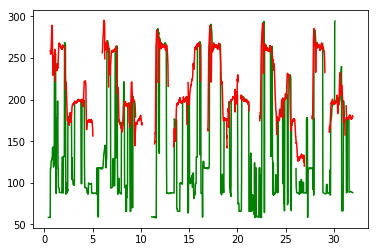

('Saving output file:', 'train10_h.wav')
('ground truth file dir:', 'train10REF.txt')


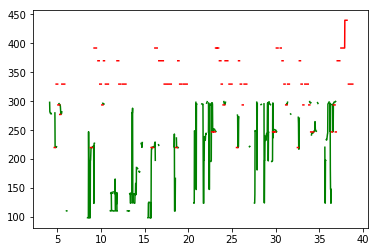

('Saving output file:', 'train11_h.wav')
('ground truth file dir:', 'train11REF.txt')


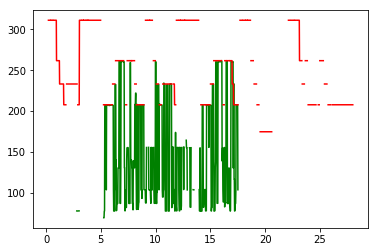

('Saving output file:', 'train12_h.wav')
('ground truth file dir:', 'train12REF.txt')


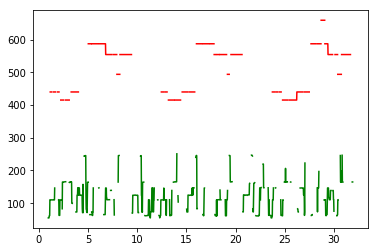

('Saving output file:', 'train13MIDI_h.wav')
('ground truth file dir:', 'train13REF.txt')


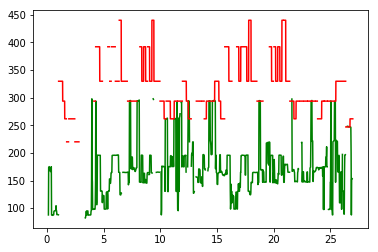

In [22]:
filenames = ['train'+str((i+1)/10)*(1-(i+1)/10)+str(i+1)+'.wav' for i in range(12)]
filenames += ['train13MIDI.wav'];filenames
ground_truth_files = ['train'+str((i+1)/10)*(1-(i+1)/10)+str(i+1)+'REF.txt' for i in range(13)]
ground_truth_files
for i in range(13):
    filename = filenames[i]
    ground_truth_file = ground_truth_files[i]
    filename,sr = save_harmonic_file(filename)
    pitch_detection(filename,sr,ground_truth_file,win_s,hop_s,downsample,tolerance,pitch_method)

22050

In [11]:
x,fs = librosa.load('train11.wav')
IPython.display.Audio(x, rate=fs)

In [12]:
X = librosa.stft(x)
H, P = librosa.decompose.hpss(X)
h = librosa.istft(H)

In [13]:
IPython.display.Audio(h, rate=fs)

In [14]:
x,fs = librosa.load('train06.wav')
IPython.display.Audio(x, rate=fs)

In [15]:
X = librosa.stft(x)
H, P = librosa.decompose.hpss(X)
h = librosa.istft(H)
IPython.display.Audio(h, rate=fs)